# CNN Architectures on MNIST: Custom, LeNet & VGGNet-inspired

## Purpose
The purpose of this study is **to try 3 drastically different Convnet Architectures on MNIST image database.**. The implementation is done in Keras. 

## Steps at a Glance:
1. Take the famous MNIST dataset as input. http://yann.lecun.com/exdb/mnist/
2. Feed it into **3-layered Convnet Architecture design inspired by LeNet, 1998 paper by Le Cunn.**
3. Find the **accuracy and draw the Loss vs Epoch Plot.**
4. Introduce Batch Normalization and Dropouts.
5. Evaluate the model again by estimating accuracy and drawing loss diagram.
6. Feed same input to **5 layered Convnet Architecture design inspired by VGGNet, 2014 paper by Andrew Zisserman.**
7. Introduce Pooling, Dropouts & evaluate the model again.
8. Feed same input to **7 layered Convnet Architecture self-designed with different-sized filters & dense layers.**
9. Introduce Batch Normalization and Dropouts & evaluate the model again.
10. Analyze the output from the above 3 architectures and draw conclusions.


## Custom-Defined Functions

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(fig, x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# To train the model using Adam
# This function is common to all models.
def trainModel(model):
    model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, Y_train, batch_size=batch_size, 
                epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    
    return history

In [8]:
# To plot the Train & Test loss graph. 
# This function is common to all models.
def plotGraph(history):

    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

    # list of epoch numbers
    x = list(range(1,epochs+1))

    # print(history.history.keys())
    # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
    # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, 
            #epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

    # we will get val_loss and val_acc only 
    # when you pass the paramter validation_data
    # val_loss : validation loss
    # val_acc : validation accuracy

    # loss : training loss
    # acc : train accuracy
    # for each key in histrory.histrory we will have 
    # a list of length equal to number of epochs

    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(fig, x, vy, ty, ax)

In [9]:
def plotWeightM1(model):
    w_after = model.get_weights()

    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)


    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')

    plt.subplot(1, 3, 2)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')

    plt.subplot(1, 3, 3)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

## Data Loading & Pre-Processing

In [23]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.layers.normalization import BatchNormalization
import seaborn as sns

batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [41]:
#Performance Tuning: GPU Memory Allocation Growth enabled for performance gain

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.Session(config = config)

## Model 1: LeNet Inspired 3-Convolution Layer Architecture

This 3-layered is different but inspired from the LeNet, 1998 paper by Le Cunn.

http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


<img src="lenet.jpg" width="700">

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.4831 - acc: 0.8484 - val_loss: 0.0695 - val_acc: 0.9798
Epoch 2/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1500 - acc: 0.9610 - val_loss: 0.0536 - val_acc: 0.9838
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.1112 - acc: 0.9718 - val_loss: 0.0485 - val_acc: 0.9855
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0951 - acc: 0.9770 - val_loss: 0.0378 - val_acc: 0.9886
Epoch 5/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0805 - acc: 0.9799 - val_loss: 0.0367 - val_acc: 0.9889
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0737 - acc: 0.9819 - val_loss: 0.0320 - val_acc: 0.9918
Epoch 7/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0702 - acc: 0.9829 - val_loss: 0.0348 -

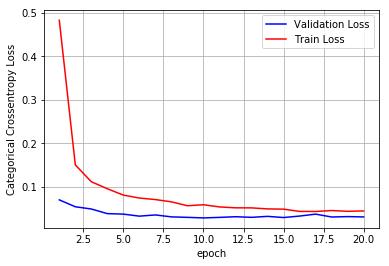

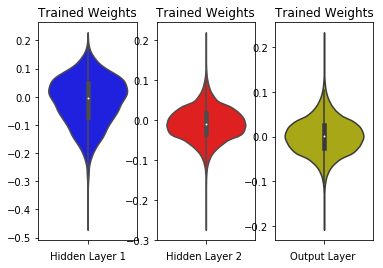

In [30]:
# The model is inspired from the LeNet, 1998 paper by Le Cunn

model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) #Convolution
model.add(MaxPooling2D(pool_size=(2, 2)))  #Subsampling
model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu')) #Convolution
model.add(MaxPooling2D(pool_size=(2, 2)))         #Subsampling
model.add(Dropout(0.25))
# model.add(BatchNormalization())

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu')) # Full Connection
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu')) # Full Connection
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plotGraph(history=history)
plotWeightM1(model=model)

## Model 2: VGGNet Inspired 5-Convolution Layered Architecture
    
This 5-layered is different but inspired from the VGGNet, 2014 paper by Andrew Zisserman.

https://arxiv.org/pdf/1409.1556.pdf
    
<img src="vgg.jpg" width="400">

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 1.7958 - acc: 0.3225 - val_loss: 0.2623 - val_acc: 0.9273
Epoch 2/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2907 - acc: 0.9210 - val_loss: 0.0506 - val_acc: 0.9866
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1438 - acc: 0.9672 - val_loss: 0.0457 - val_acc: 0.9894
Epoch 4/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1084 - acc: 0.9760 - val_loss: 0.0322 - val_acc: 0.9922
Epoch 5/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0943 - acc: 0.9803 - val_loss: 0.0344 - val_acc: 0.9926
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0839 - acc: 0.9823 - val_loss: 0.0272 - val_acc: 0.9931
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0800 - acc: 0.9845 - val_loss: 0.

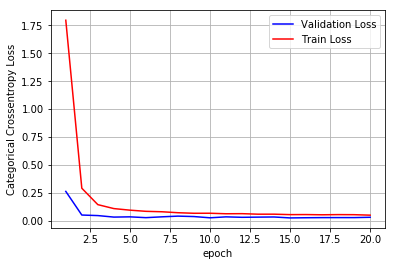

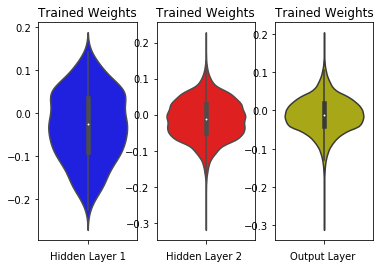

In [32]:
# The model is inspired from the VGGNet, 2014 paper by Andrew Zisserman.

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plotGraph(history=history)
plotWeightM1(model=model)

## Model 3: 7-Layered CNN Architecture

This 7-layered is Convolution Architecture is custom built with different kernel sizes and dropout/ max pool considerations.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 241s 4ms/step - loss: 2.3024 - acc: 0.1124 - val_loss: 2.2724 - val_acc: 0.1628
Epoch 2/20
60000/60000 [==============================] - 237s 4ms/step - loss: 2.2988 - acc: 0.1217 - val_loss: 1.9678 - val_acc: 0.3465
Epoch 3/20
60000/60000 [==============================] - 238s 4ms/step - loss: 0.9734 - acc: 0.6832 - val_loss: 0.1673 - val_acc: 0.9589
Epoch 4/20
60000/60000 [==============================] - 237s 4ms/step - loss: 0.2232 - acc: 0.9510 - val_loss: 0.1343 - val_acc: 0.9725
Epoch 5/20
60000/60000 [==============================] - 237s 4ms/step - loss: 0.1447 - acc: 0.9698 - val_loss: 0.0657 - val_acc: 0.9872
Epoch 6/20
60000/60000 [==============================] - 237s 4ms/step - loss: 0.1128 - acc: 0.9772 - val_loss: 0.0489 - val_acc: 0.9892
Epoch 7/20
60000/60000 [==============================] - 237s 4ms/step - loss: 0.1029 - acc: 0.9796 - val_loss: 0.0476 - 

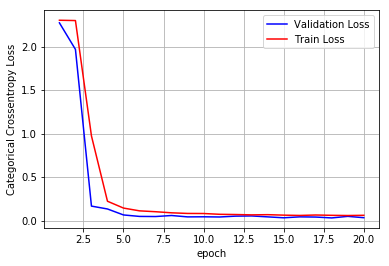

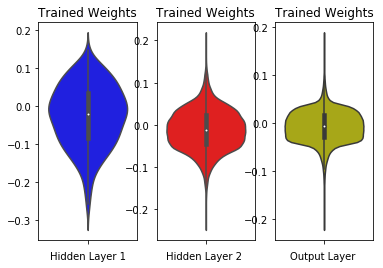

In [40]:
# The model is custom-built for the purpose of performance evaluation.

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
##
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(768, kernel_size=(4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(1024, kernel_size=(4, 4), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2048, kernel_size=(4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plotGraph(history=history)
plotWeightM1(model=model)

# Conclusions

1. The **performance of standard-model inspired networks are found higher** than complex custom built architectures. 
2. The **convergence of model M2 happened much before Model 1. Number of epochs required is less.**
3. The **99.5% accuracy of VGGNet-inspired M2 model is better than LeNet-inspired M1.**
4. The distribution of weights are found to be normally distributed.
5. The huge increase in number of filters and different sized kernels did not help much.
6. **VGGNet-inspired 5-layered model, M2 is found to be model of choice.** It even outperformed a 7-layered Convnet with huge number of parameters. The convergence speed w.r.t. epochs is also comparable between M2 and M3.
